In [1]:
import os
import sys

import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec

get_ipython().magic(u'matplotlib inline')

sys.path.append('../3_analyze')
from containers import Dataset
from utils import export, show_side_by_side, load_score_file
from statistics import *

sys.path.append('../1_dock')
from parse_chembl import load_chembl_raw, load_chembl_proc

In [2]:
data_dir = '/scratch/PI/rondror/jbelk/method/data'
glide_dir = 'docking/glide12'
ifp_dir = 'ifp/ifp12'
mcss_dir = 'mcss/mcss7'

In [3]:
stats_prots = ['SIGMA1','5HT2B']
struct_dict = {'AR':'2PNU','A2AR':'2YDO','B1AR':'2VT4','B2AR':'2RH1','CHK1':'2BRN', 'PLK1':'2OWB',
               'VITD':'2HB7','BRAF':'3IDP','JAK2':'3KRR','CDK2':'1H1S','ERA':'1A52','GCR':'3K23',
               'SIGMA1':'5HK1','5HT2B':'4IB4'
              }

features = {
    'mcss':[],
    'hbond':[2,3],
    'sb':[4],
    #'pipi1':[5],
    'pipi':[6],
    #'picat':[7,8],
    #'c1':[10],
    'contact':[11]
}

all_data = Dataset(stats_prots, data_dir, glide_dir, ifp_dir, mcss_dir)

ligands = {p:prot.lm.pdb for p,prot in all_data.proteins.items()}
st = {p:[struct_dict[p]] for p,prot in all_data.proteins.items()}

all_data.load(ligands, st, load_fp=True, load_mcss=True)

In [4]:
num_stats_ligs = 50

stats = Statistics(all_data, stats_prots, num_stats_ligs, 100, features, 0.02)

warning, only 2 ligands found for 5HT2B


sb


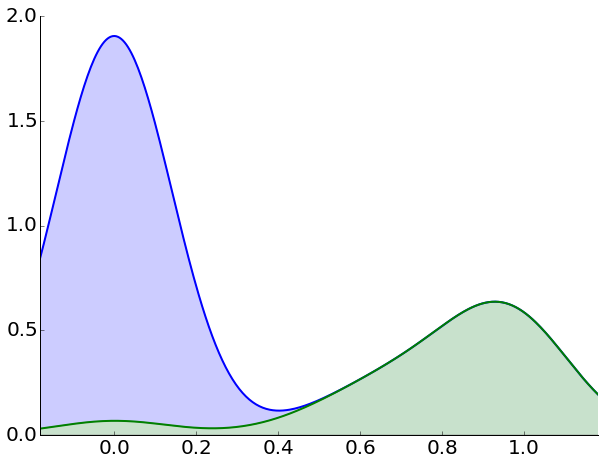

mcss


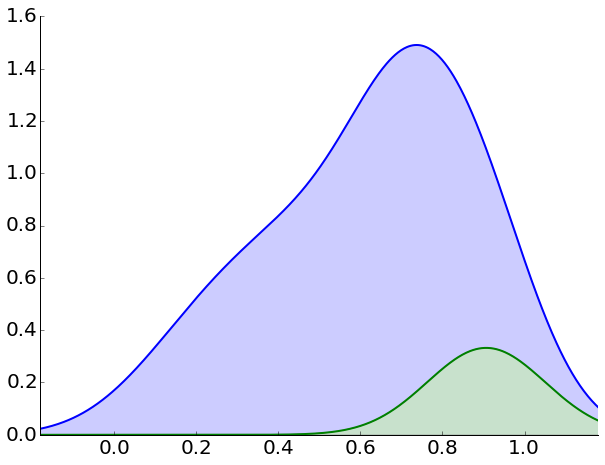

pipi


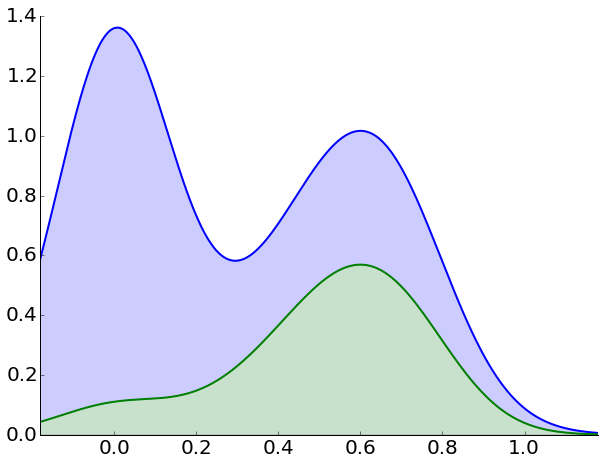

hbond


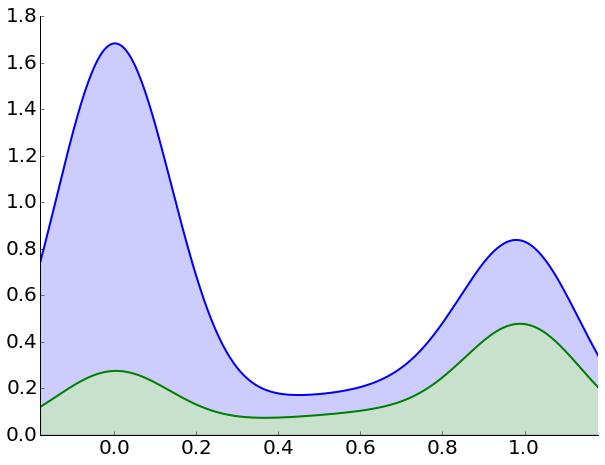

In [5]:
for f_name in features.keys():
    if f_name == 'contact': continue
    print f_name
    stats.show_stats(f_name, raw=False, smoothed=True, conditional=False)
    #stats.show_stats_by_pair(f_name, raw=False, smoothed=True)